In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display

PATH_0 = "../birdclef-2022-data"
PATH_1 = "birdclef-2022-data"

meta = pd.read_csv(f"{PATH_1}/train_metadata.csv")

base_path = f'{PATH_1}/train_audio/'
audio_name = f'{PATH_1}/train_audio/afrsil1/XC125458.ogg'
image_directory = f'{PATH_1}/train_images/'
hop_length = 512
window_size = 1024

meta.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
0,afrsil1,[],"['call', 'flight call']",12.3910,-1.4930,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:00,https://www.xeno-canto.org/125458,afrsil1/XC125458.ogg
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
2,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,afrsil1/XC177993.ogg
3,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,afrsil1/XC205893.ogg
4,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,afrsil1/XC207431.ogg


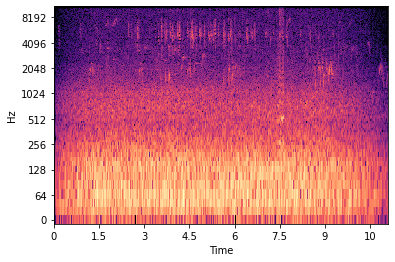

In [4]:
y, sr = librosa.load(audio_name)
window = np.hanning(window_size)
out  = librosa.core.spectrum.stft(y, n_fft = window_size, hop_length = hop_length,
       window=window)
out = 2 * np.abs(out) / np.sum(window)

librosa.display.specshow(librosa.amplitude_to_db(out,ref=np.max),
               y_axis='log', x_axis='time')

In [5]:
import skimage.io

def spectrogram_image(y, sr, out, hop_length, n_mels):
    # use log-melspectrogram
    mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels,
                                            n_fft=hop_length*2, hop_length=hop_length)
    mels = np.log(mels + 1e-9) # add small number to avoid log(0)

    # min-max scale to fit inside 8-bit range
    img = scale_minmax(mels, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. make black==more energy

    # save as PNG
    skimage.io.imsave(image_directory + out + '.png', img)

def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def load_batch_spectograms(audio_names):
    for entry in audio_names:
        y, sr = librosa.load(base_path + entry)
        spectrogram_image(y, sr, entry[:-4], hop_length, 256)

In [6]:
spec = spectrogram_image(y, sr, hop_length, 256)
plt.imshow(spec)

TypeError: spectrogram_image() missing 1 required positional argument: 'n_mels'

In [ ]:
# careful, this takes multiple hours to run

def generate_spectograms():

    names = meta['filename']
    load_batch_spectograms(names)


C:\Users\CYBORGX\anaconda3\envs\birdclef\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=769
  return f(*args, **kwargs)


In [15]:
import os
def add_folder_structure():
    names = meta['primary_label'].unique()
    for name in names:
        os.mkdir(image_directory + name)

In [16]:
add_folder_structure()